# Лабораторная работа № 4
## Сети с радиальными базисными элементами

In [7]:
import matplotlib.pyplot as plt
from math import pi, cos, sin
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.svm import SVC

from neupy.algorithms import PNN, GRNN


from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [8]:
step = 0.025
tPoints = np.linspace(0, 2*np.pi, int(2*np.pi/step), endpoint=True)

def split_df(df):
    x_train, x_test = train_test_split(df, test_size=0.3, shuffle=True, random_state=20)
    x_valid, x_test = train_test_split(x_test, test_size=0.3, shuffle=True, random_state=76)
    return x_train, x_valid, x_test

In [9]:
first = np.random.permutation(tPoints)[:120]
second = np.random.permutation(tPoints)[:100]
third = np.random.permutation(tPoints)[:60]

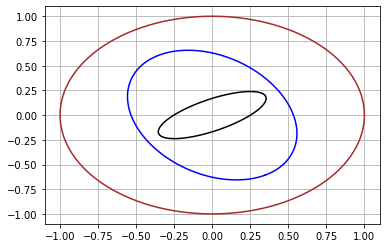

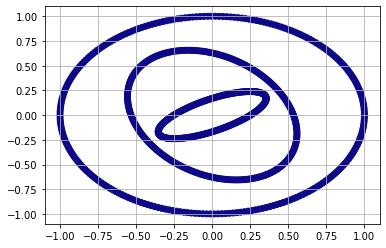

In [10]:
t = np.arange(0, 2*pi, 0.025)
a = [0.4, 0.7, 1]
b = [0.15, 0.5, 1]
alpha = [pi/6,-pi/3,0]
x = lambda t,n: a[n]*cos(t)*cos(alpha[n]) - b[n]*sin(t)*sin(alpha[n])
y = lambda t,n: a[n]*cos(t)*sin(alpha[n]) + b[n]*sin(t)*cos(alpha[n])

plt.plot([x(i,0) for i in t],[y(i,0) for i in t], 'black')
plt.plot([x(i,1) for i in t],[y(i,1) for i in t], 'blue')
plt.plot([x(i,2) for i in t],[y(i,2) for i in t], 'brown')
plt.grid(True)
plt.show()

df1 = pd.DataFrame({'x' : [x(i,0) for i in t], 'y' : [y(i,0) for i in t], 'target' : 0})
df2 = pd.DataFrame({'x' : [x(i,1) for i in t], 'y' : [y(i,1) for i in t], 'target' : 1})
df3 = pd.DataFrame({'x' : [x(i,2) for i in t], 'y' : [y(i,2) for i in t], 'target' : 2})

for idx, df in enumerate((df1, df2, df3)):
    plt.scatter(df.x, df.y, c= df.target, cmap=plt.cm.plasma)
    plt.grid(True)
plt.show()

In [11]:
train = []
valid = []
test = []

for df in (df1, df2 ,df3):
    tr, v, te = split_df(df)
    train.append(tr)
    valid.append(v)
    test.append(te)
train = pd.concat(train)
valid = pd.concat(valid)
test = pd.concat(test)

In [12]:
print(len(train))
print(len(valid))
print(len(test))

528
159
69


In [29]:
def fit_and_make_scores(model, train, test, valid):
    model.fit(train.iloc[:, :-1], train['target'])
    p = []
    p.append(model.predict(train.iloc[:, :-1]))
    print(accuracy_score(train['target'], p[-1]))
    p.append(model.predict(test.iloc[:, :-1]))
    print(accuracy_score(test['target'], p[-1]))
    p.append(model.predict(valid.iloc[:, :-1]))
    print(accuracy_score(valid['target'], p[-1]))
    titles = ['train', 'test', 'valid']
    for idx, df in enumerate((train, test, valid)):
        plt.scatter(df.x, df.y, c=p[idx], cmap=plt.cm.plasma)
        plt.grid(True)
        plt.title(titles[idx])
        plt.show()

In [30]:
def print_map(model):
    hx = 0.05
    hy = 0.05
    grid_pred = [model.predict(np.array([[i, j]])).round(1) for i in np.arange(-1, 1, hx) for j in np.arange(-1, 1, hy)]
    x_vals = np.arange(-1, 1, hy)
    y_vals = np.arange(-1, 1, hx)
    xx, yy = np.meshgrid(x_vals, y_vals)
    # rows = len(grid_pred)
    # colors = np.array(grid_pred).reshape((rows, 3))
    # colors.shape
    plt.scatter(yy, xx, c=grid_pred, cmap=plt.cm.plasma);
    plt.show()

0.9090909090909091
0.8985507246376812
0.89937106918239


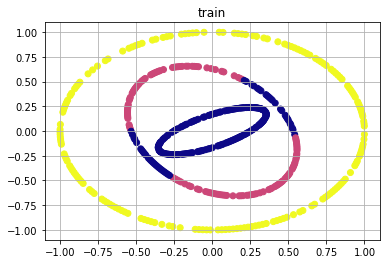

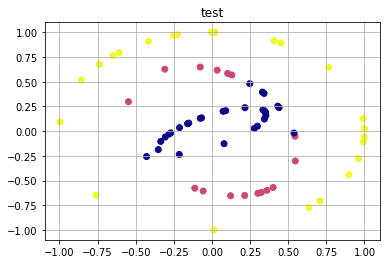

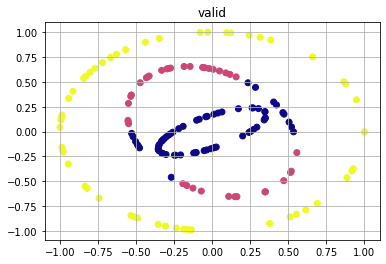

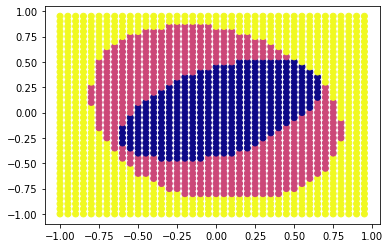

In [31]:
# Задание №1
model = PNN(std=0.3)

fit_and_make_scores(model, train, test, valid)
print_map(model)

0.9943181818181818
0.9710144927536232
0.9874213836477987


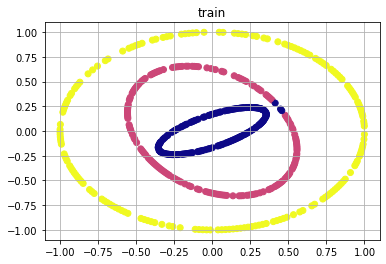

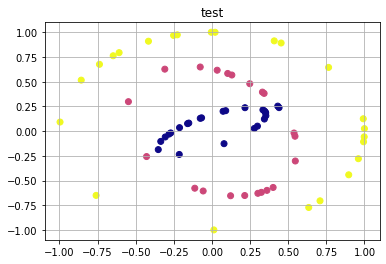

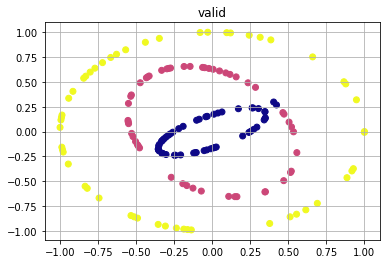

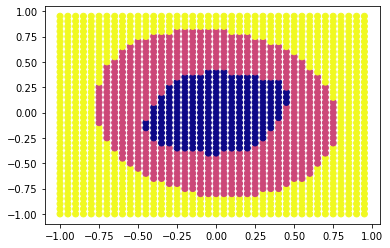

In [32]:
model = PNN(std=0.1)

fit_and_make_scores(model, train, test, valid)
print_map(model)

1.0
1.0
1.0


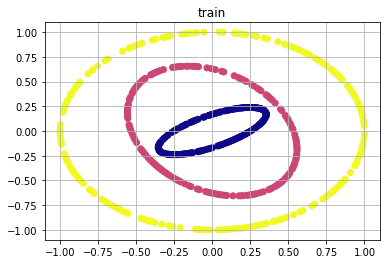

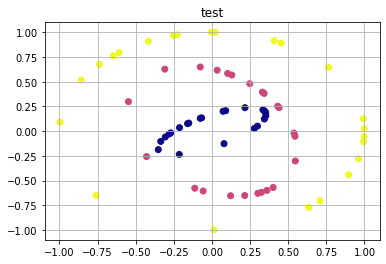

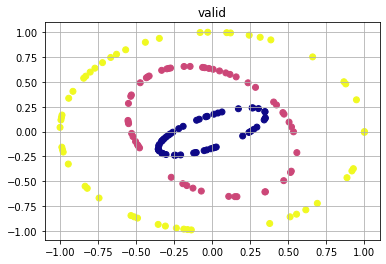

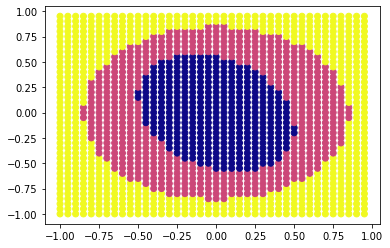

In [33]:
# Задание №2
model = SVC(kernel='rbf', C=1e2, gamma=0.3)
fit_and_make_scores(model, train, test, valid)
print_map(model)

In [23]:
# Задание №3

220


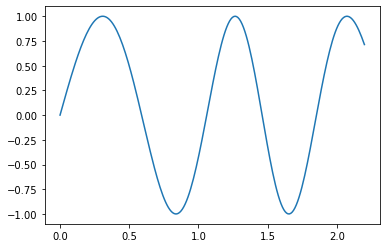

In [34]:
h = 0.01
t = np.linspace(0, 2.2, int(2.2/h), endpoint=True)
x = list(map(lambda t: sin(sin(t)* t**2 + 5*t), t))
plt.plot(t, x)
print(len(t))

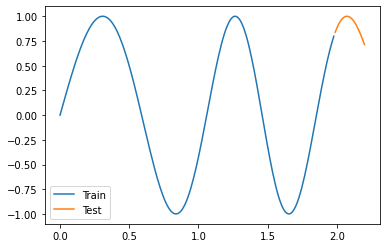

In [35]:
train_size = int(len(t) * 0.9)

X_train = t[:train_size]
y_train = x[:train_size]
plt.plot(X_train, y_train, label='Train')

X_test = t[train_size:]
y_test = x[train_size:]

plt.plot(X_test, y_test, label = 'Test')
plt.legend()
plt.show()

In [36]:
model = GRNN(std=0.09)

In [37]:
model.fit(X_train, y_train)

GRNN(verbose=False, std=0.09)

RMSE on train = 0.08266327310553372 
RMSE on test = 0.2628997014155284


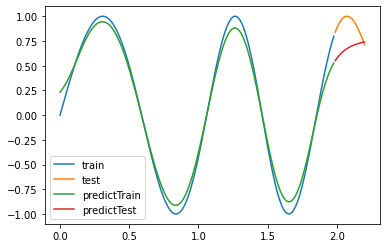

In [38]:
plt.plot(X_train, y_train, label='train')
plt.plot(X_test, y_test, label='test')

pred_x = model.predict(X_train[:])
mse = mean_squared_error(y_train, pred_x.flatten())
plt.plot(X_train, pred_x, label='predictTrain')
print(f'RMSE on train = {np.sqrt(mse)} ')

pred_x = model.predict(X_test[:])
mse = mean_squared_error(y_test, pred_x.flatten())
plt.plot(X_test, pred_x, label='predictTest')
print(f'RMSE on test = {np.sqrt(mse)}')

plt.legend()
plt.show()

# Выводы
Сети с радиально базисными элементами показались мне наиболее интересными, особенно вероятностные и GRNN. Обучение мгновенное, а результат неплохой. Они совсем не подходят для предсказания результата "в будущее" как было в задании лабораторной, но вот для простенькой классификации или регрессии в самый раз.